Project to identify Personal Loan Customers.
------------------------------------------------------------------------------

Bank is interested in converting its liability customers to asset customers by offering them personal loans.
A campaign run the previsous year showed a conversin rate of 9%. This year they are interested in increasing the conversion rate by targeting high probaility customers. This is a model to predict those customers that are highly likely to accept the personal loan offer.

In [169]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [170]:
df = pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


2. Study the data distribution in each attribute, share your findings. (10 points)

In [171]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [172]:
df.shape


(5000, 14)

In [173]:
#check if any NULL data is there
df.apply(lambda x : sum(x.isnull()))

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

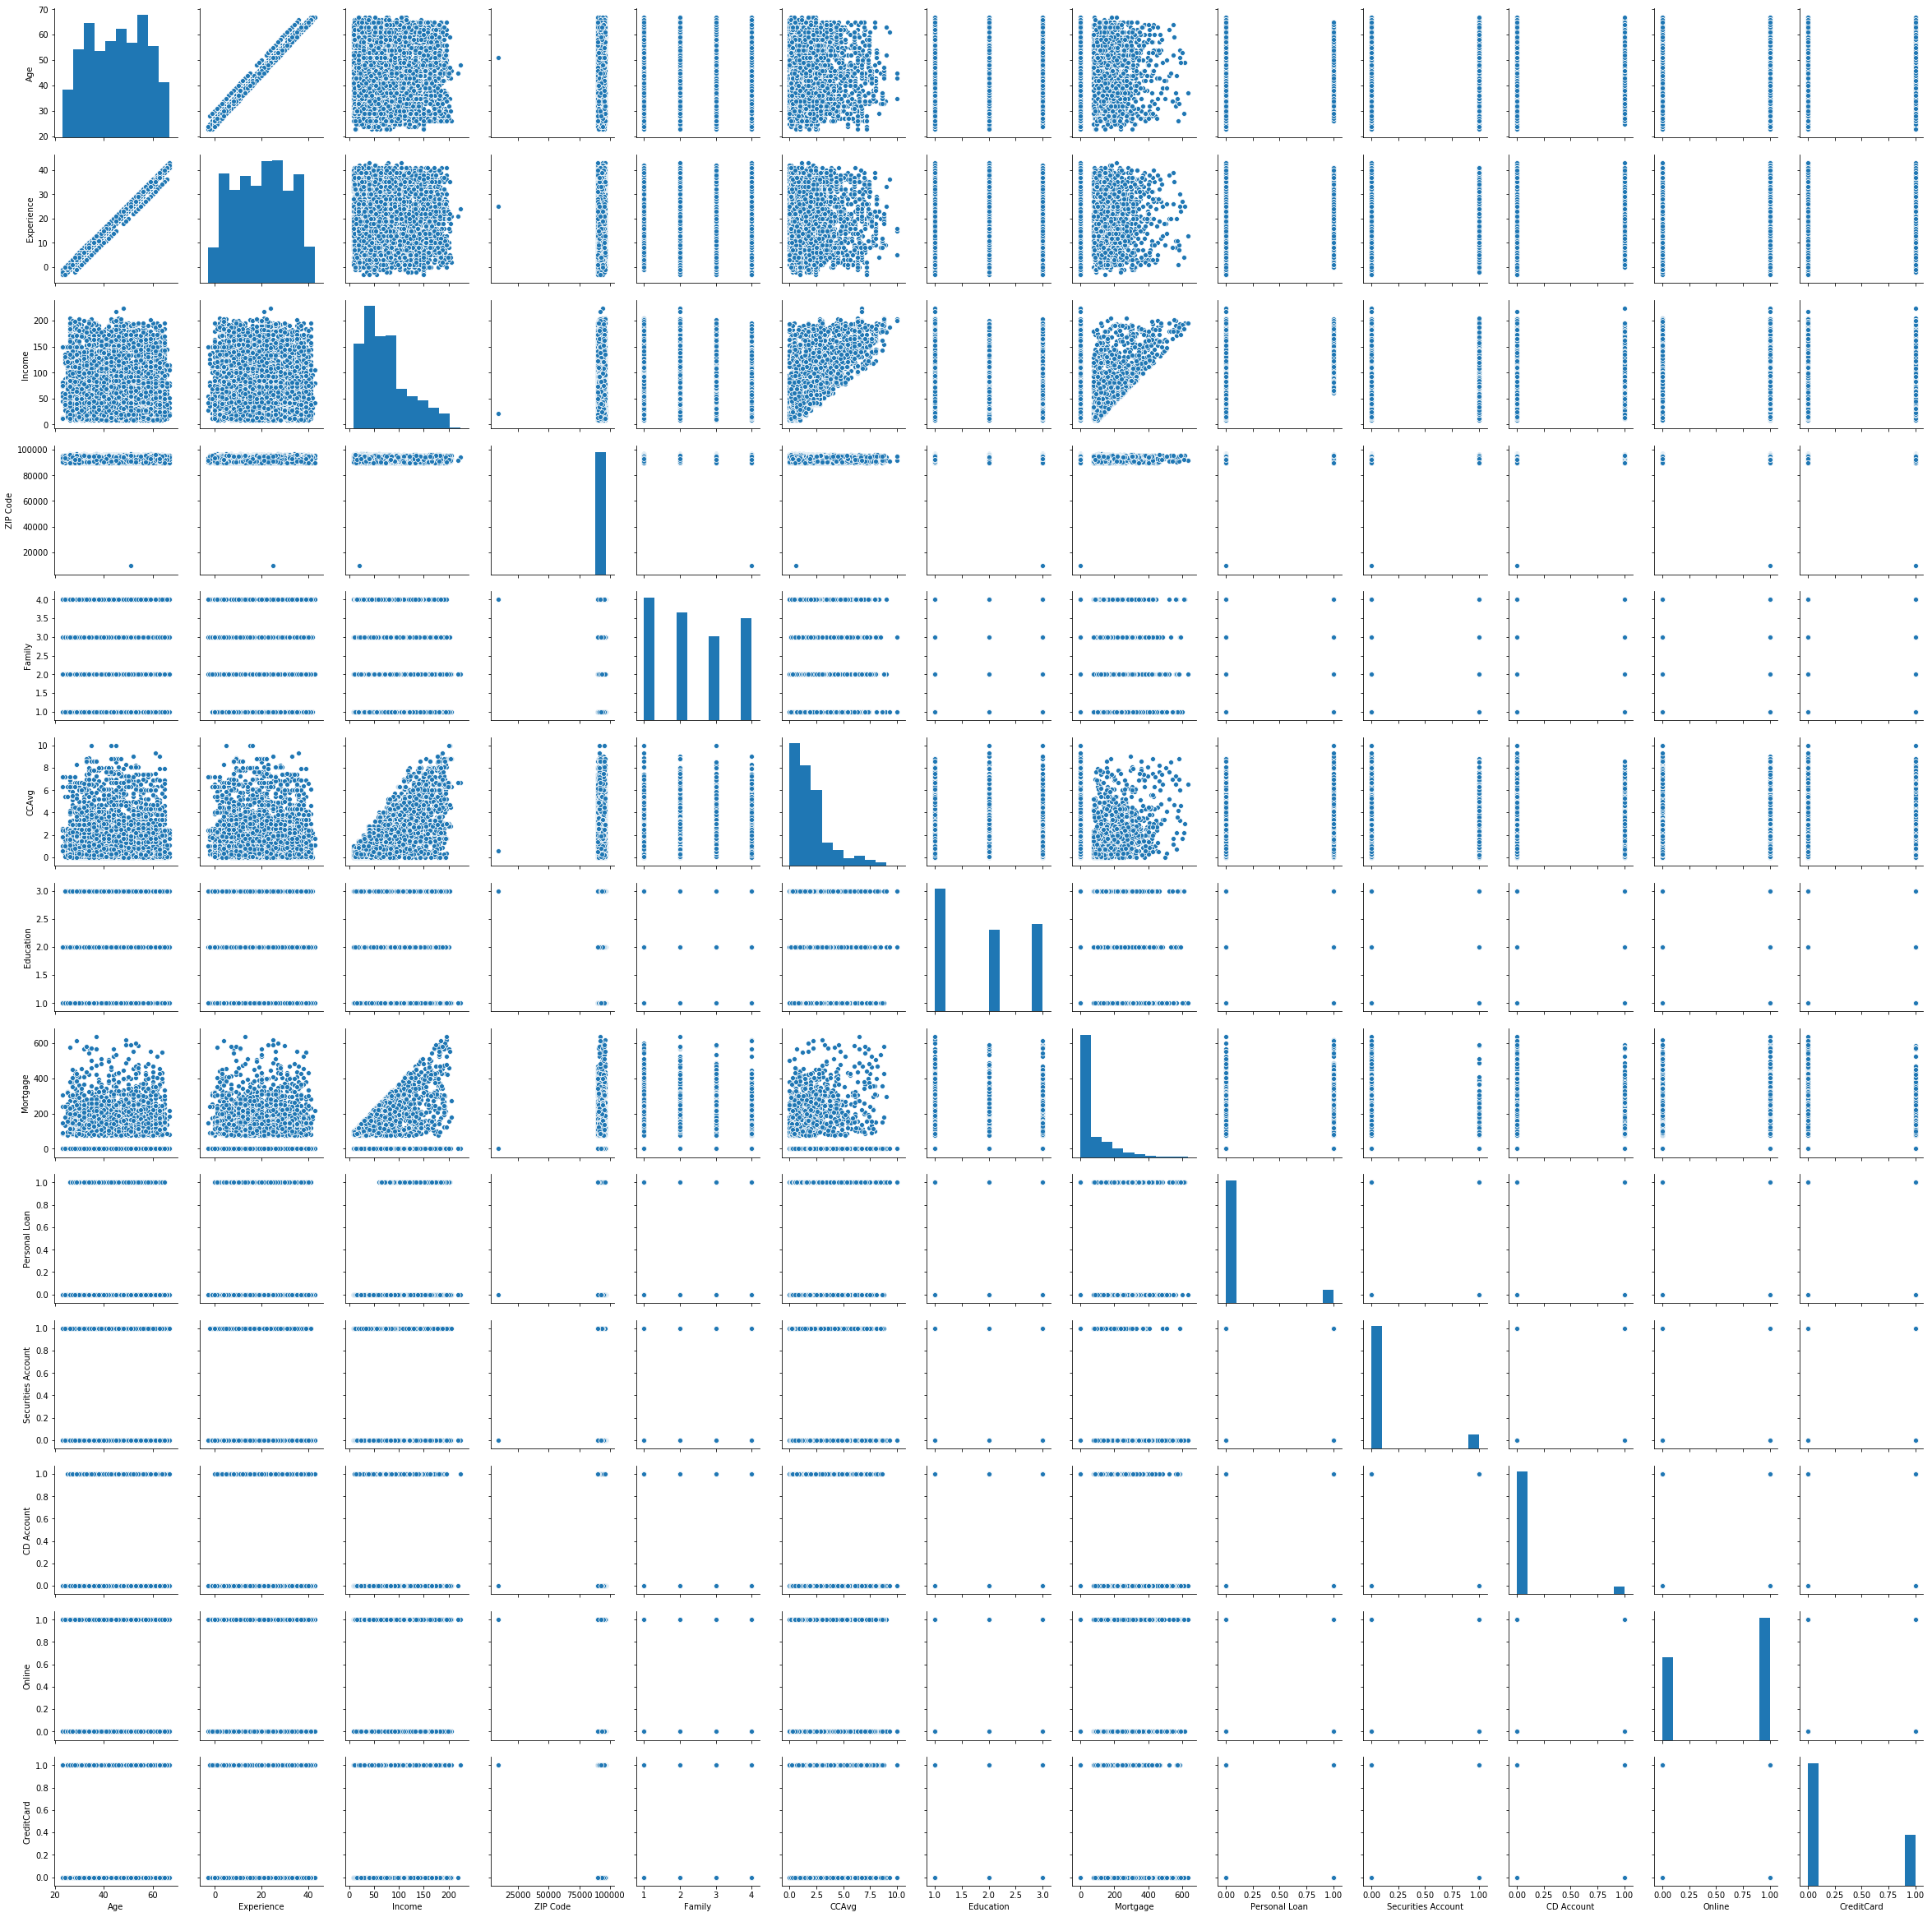

In [174]:
#plot 
sns.pairplot(df.iloc[:,1:])

(array([192., 592., 505., 581., 524., 660., 663., 501., 586., 196.]),
 array([-3. ,  1.6,  6.2, 10.8, 15.4, 20. , 24.6, 29.2, 33.8, 38.4, 43. ]),
 <a list of 10 Patch objects>)

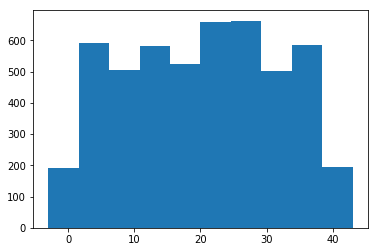

In [175]:
plt.hist(df['Experience'])

(array([1683., 1376., 1039.,  319.,  219.,   97.,  132.,   84.,   45.,
           6.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

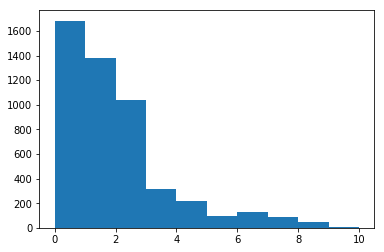

In [176]:
plt.hist(df['CCAvg'])

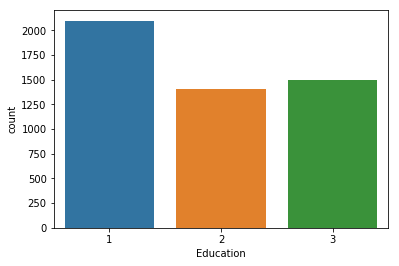

In [177]:
sns.countplot(df['Education'])

1.Age : we can see that majority are between 30 to 60 
2.Experience : Majority of people have xperience between 8 to below 40 years
3.Income : This is positively skewed. Majority of the customers have income between 45K and 55K. 
4.CCAvg:This is  also a positively skewed variable and average spending is between 0K to 10K and majority spends less than 2.5K
5.Education: Here we can see that majority of them are undergraduate level.
6.Mortgage: 70% of the individuals have a mortgage of less than 40K. However the max value is 635K

Lets see impact of education on income

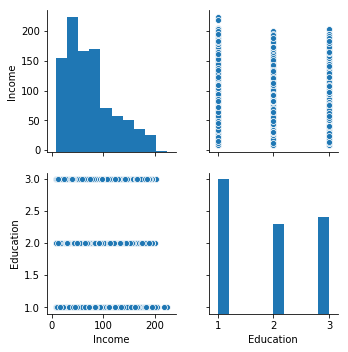

In [178]:
sns.pairplot(data=df[['Income','Education']])
# from this we see tha undergraduates earn more than others

Now lets see what all influence personal loan

1.Influence of income and Education on personal loan
2.Influence of family on personal loan
3.Influence of mortage on personla loan



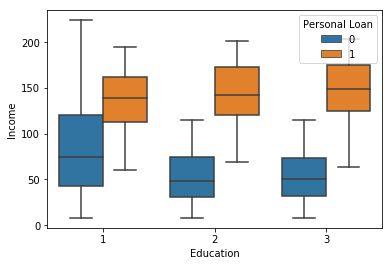

In [179]:
#1.Influence of income and Education on personal loan

sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=df)


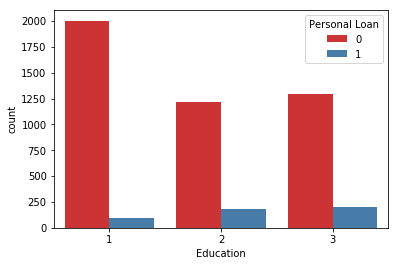

In [180]:
sns.countplot(x='Education',data=df,hue='Personal Loan',palette='Set1')

There is no significant difference between education level and personal loan

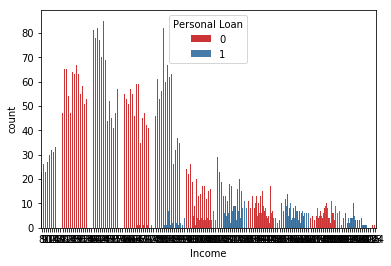

In [181]:
sns.countplot(x='Income',data=df,hue='Personal Loan',palette='Set1')

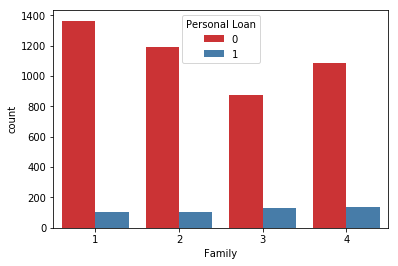

In [182]:
#2.Influence of family on personal loan
sns.countplot(x='Family',data=df,hue='Personal Loan',palette='Set1')

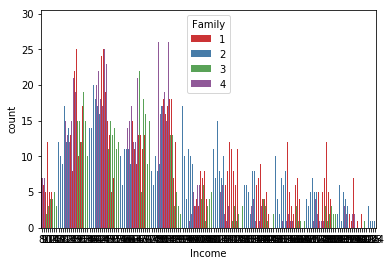

In [183]:
sns.countplot(x='Income',data=df,hue='Family',palette='Set1')

Family doesnt inpact significantly on personal Loan although family with 3 & 4 have taken more personal loans compared to others

3.Influence of mortage on personla loan

C:\Users\brao.PW\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\brao.PW\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


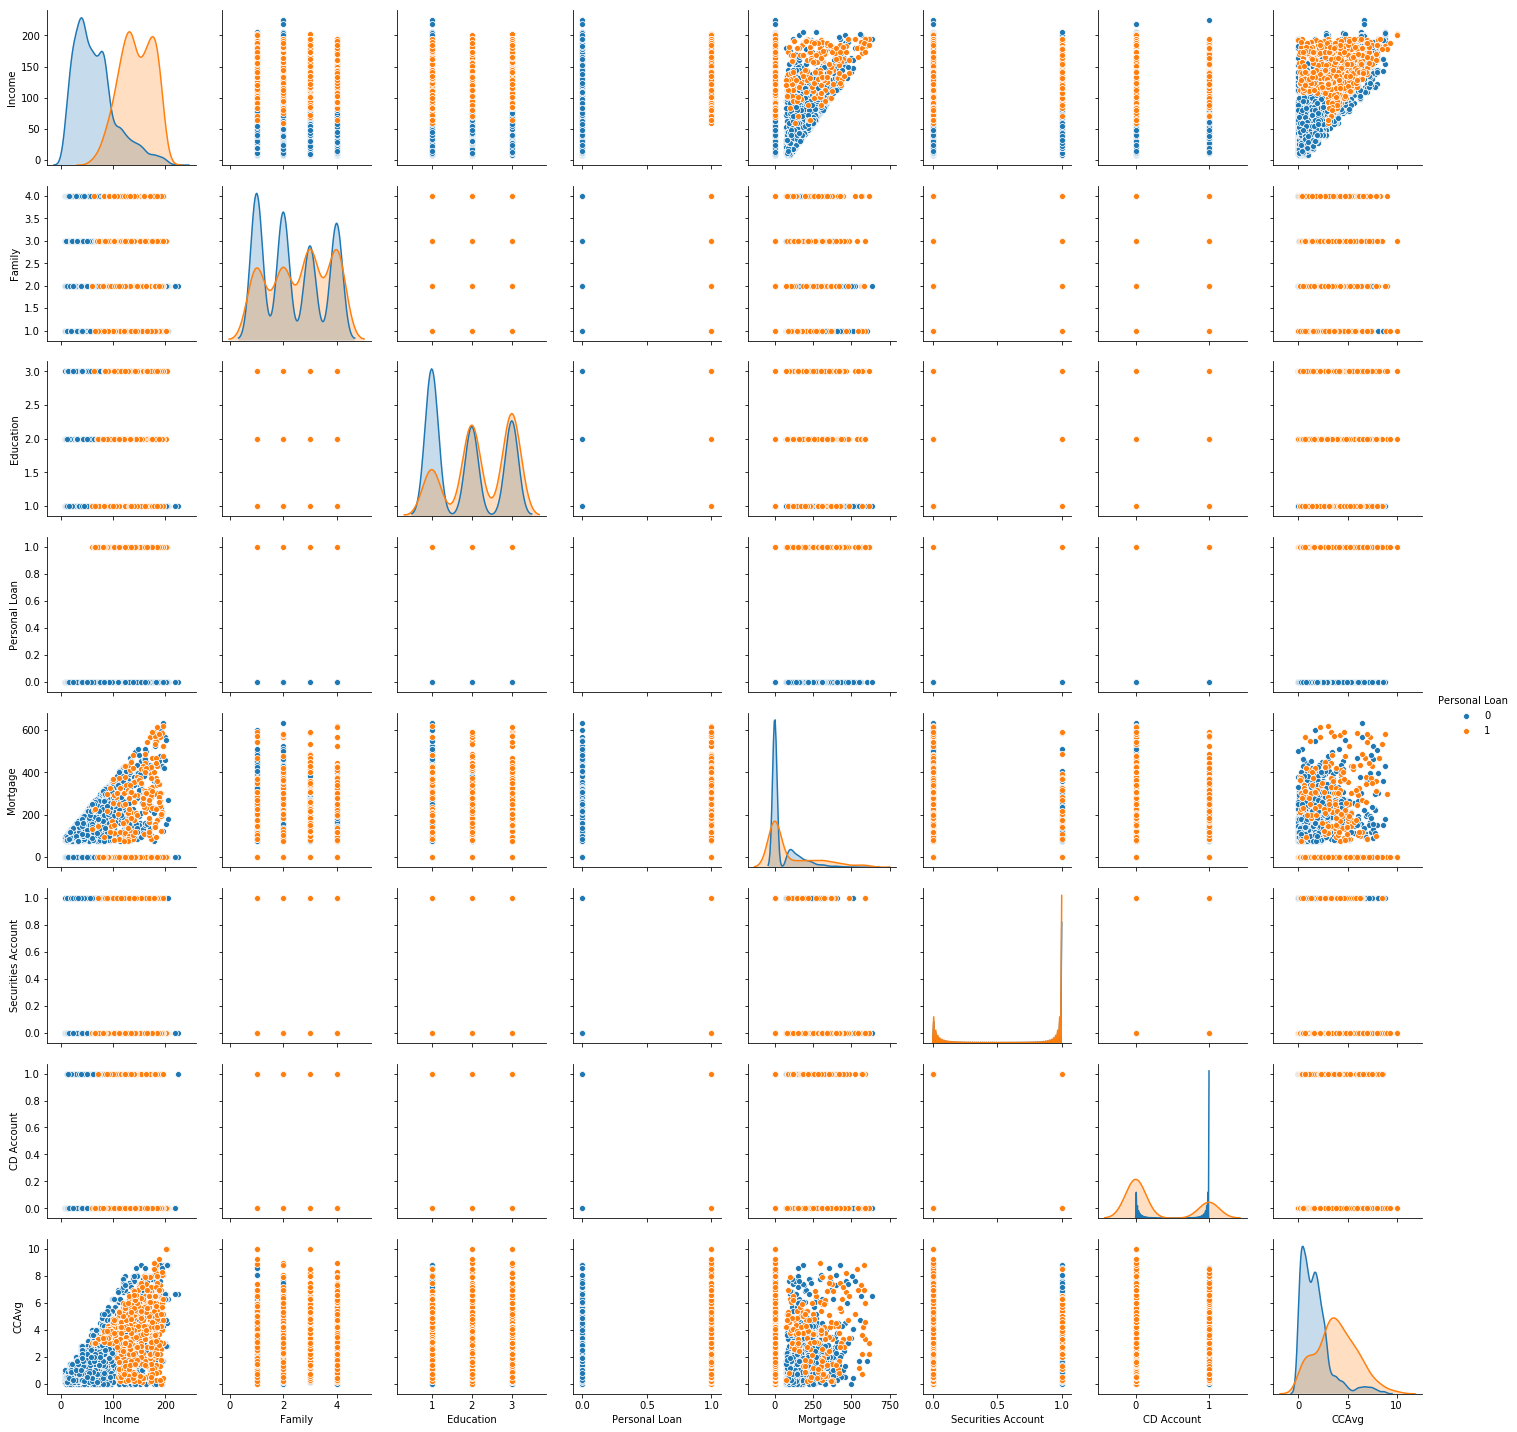

In [184]:
df1 = df[['Income','Family','Education','Personal Loan','Mortgage','Securities Account','CD Account','CCAvg']]
sns.pairplot(data=df1,hue='Personal Loan')

Customers who doesnt not have CD account have no loans.People who have higher CC avg also has personal loans

In [185]:

#lets see data correlation
df.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


Age and Experience are highly correlated so one we can drop.

#check how income and family are influencing personal loan ...Are families with less income taking more loans??

Mean Income of family with 1  78.62228260869566
Mean Income of family with 2  84.2391975308642
Mean Income of family with 3  66.9049504950495
Mean Income of family with 4  62.51309328968903
Number of personal loan takers with Family 1 :Total (107, 15) (1472, 15)
Number of personal loan takers with Family 2: Total (106, 15) (1296, 15)
Number of personal loan takers with Family 3: Total (133, 15) (1010, 15)
Number of personal loan takers with Family 4: Total (134, 15) (1222, 15)


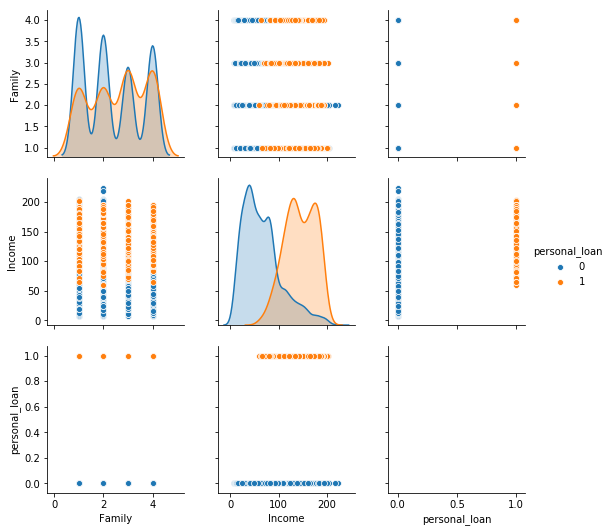

In [186]:
df["personal_loan"] = df['Personal Loan']
df_family = df[df.Family ==1]
print("Mean Income of family with 1 ",df_family['Income'].mean())
df_family2 = df[df.Family ==2]
print("Mean Income of family with 2 ",df_family2['Income'].mean())
df_family3 = df[df.Family ==3]
print("Mean Income of family with 3 ",df_family3['Income'].mean())
df_family4 = df[df.Family ==4]
print("Mean Income of family with 4 ",df_family4['Income'].mean())

#Number of personal loan taken with family 1
print("Number of personal loan takers with Family 1 :Total",df_family[df_family.personal_loan ==1].shape,df_family.shape)

print("Number of personal loan takers with Family 2: Total",df_family2[df_family2.personal_loan ==1].shape,df_family2.shape)

print("Number of personal loan takers with Family 3: Total",df_family3[df_family3.personal_loan ==1].shape,df_family3.shape)
print("Number of personal loan takers with Family 4: Total",df_family4[df_family4.personal_loan ==1].shape,df_family4.shape)

df_test = df[['Family','Income','personal_loan']]
sns.pairplot(data=df_test,hue='personal_loan')

we see that family with 2 has higher mean income, Also families with income greater than 80-100k are more likely to take loans.
After all the analysis now clean the data as we see that experience is showing some negative values, will replace it with median. Also drop the Age as experience and age are highly correlated

In [187]:
df['Experience'].values[df['Experience'].values <0] = df['Experience'].mean()
print(df[df['Experience'] < 0]['Experience'].count())
#df.drop('Age',inplace=True,axis=1)
df.drop(['personal_loan'],inplace=True,axis=1)
df.head()

0


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


3. Get the target column distribution. 


In [188]:
x= df.drop(['Personal Loan','ID'],axis=1)
#Also drop ID and CCAVG
y= df['Personal Loan']


In [189]:
from sklearn.model_selection import train_test_split
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=1)




In [190]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
# calculate accuracy measures and confusion matrix
from sklearn import metrics

model = LogisticRegression(penalty='none',solver='lbfgs')
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))

0.908
[[1318   33]
 [ 105   44]]


In [191]:
#Naive Bayes

from sklearn import model_selection
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

train_set, test_set = train_test_split(df.drop(['ID'], axis=1), test_size=0.3 , random_state=10)
train_labels = train_set.pop('Personal Loan')
test_labels = test_set.pop('Personal Loan')

naive_model = GaussianNB()
naive_model.fit(train_set, train_labels)

prediction = naive_model.predict(test_set)
naive_model.score(test_set,test_labels)

0.886

In [192]:
# KNN
test_size=0.30
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=20)


In [194]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors= 7 , weights = 'uniform', metric='euclidean')
knn.fit(X_train, y_train)    
predicted = knn.predict(X_test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, predicted)
print(acc)

0.8946666666666667


From the above scores will chose logistic regression model as it has high accuracy.